# Getting Started With Statsmodel

In [1]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

## Data:

- We download the Guerry dataset, a collection of historical data used in support of Andre-Michel Guerry’s 1833 Essay on the Moral Statistics of France. 

In [2]:
# load dataset
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [3]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']

df = df[vars]

df[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [4]:
df = df.dropna()
df.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [5]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [6]:
y[:3]

,Lottery
0,41.0
1,38.0
2,66.0


In [7]:
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0


In [8]:
# describe the model
mod = sm.OLS(y, X)

# fit the model
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           1.07e-05
Time:                        13:51:22   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      0.000      19.826      57.478
Region[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
Region[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
Region[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
Region[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy       -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth          0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [10]:
res.rsquared

np.float64(0.337950869192882)

### Diagnostics and specification tests

In [12]:
#the first number is an F-statistic and that the second is the p-value.
fstatistic, pvalue = sm.stats.linear_rainbow(res)
print(f"F-Statistic: {fstatistic:.2f}")
print(f"P-Value: {pvalue:.2f}")

F-Statistic: 0.85
P-Value: 0.70


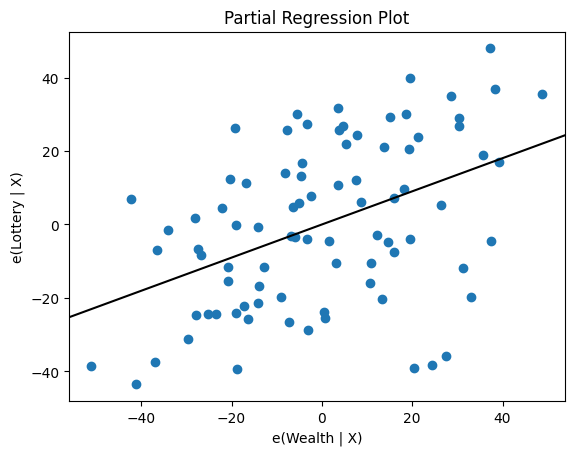

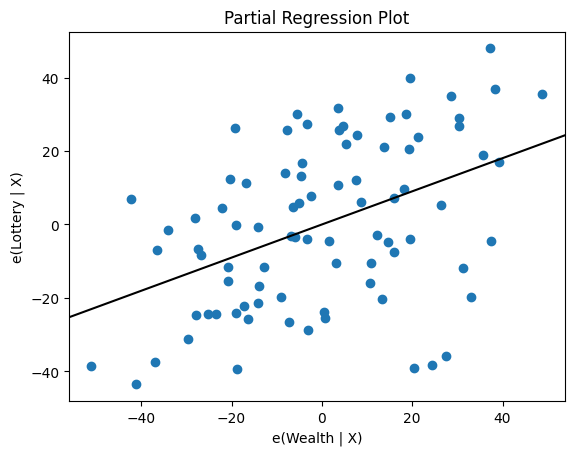

In [13]:
sm.graphics.plot_partregress('Lottery','Wealth', ['Region','Literacy'], data=df, obs_labels=False)